# Statistical Data Visualization Q1.a

In [1]:
# importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy.stats as ss

In [2]:
# importing datasets

data = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Statistical Data Visualization\\Q2_b.csv')

In [3]:
# Checking the features
data.head()

,Unnamed: 0,SP,WT
0,1,104.185353,28.762059
1,2,105.461264,30.466833
2,3,105.461264,30.193597
3,4,113.461264,30.632114
4,5,104.461264,29.889149


In [4]:
# Dropping irrelevant feature

data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
# Shape of dataset
data.shape

(81, 2)

In [6]:
# Check for null values
data.isnull().sum()

SP    0
WT    0
dtype: int64

There are no null values

In [7]:
# Check for duplicate values
data.duplicated().sum() 

0

There are no duplicate values

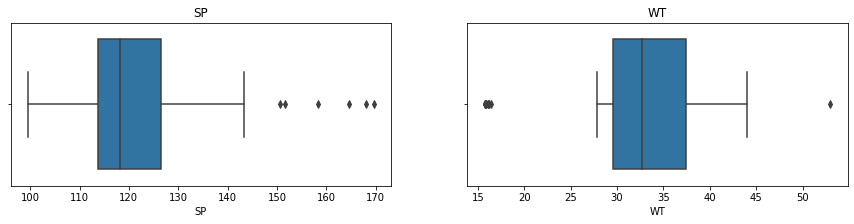

In [8]:
# Boxplot for outliers
plt.subplots(1,2,figsize=(15,3))
plt.subplot(121) ; sns.boxplot(x = data.iloc[:,0]);plt.title('SP');
plt.subplot(122) ; sns.boxplot(x = data.iloc[:,1]);plt.title('WT');

SP and WT features has outliers

In [9]:
# Removing outliers

for col in data.columns:
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    low_end = data[col].quantile(0.25) - (1.5*IQR)
    upper_end = data[col].quantile(0.75) + (1.5*IQR)
    if low_end<0:
        low_end =0
        data[col] = pd.DataFrame(np.where(data[col] > upper_end,upper_end, 
                          np.where(data[col] < low_end,low_end,data[col])))
    else:
        data[col] = pd.DataFrame(np.where(data[col] > upper_end,upper_end, 
                  np.where(data[col] < low_end,low_end,data[col])))

In [10]:
# Mean, Median, Mode, Variance, Standard Deviation, Kurtosis and Skewness

for column in data.columns:
    mean = np.round(np.mean(data[column]),2); print('Mean[{}] : {}'.format(column,mean));
    median = np.median(data[column]); print('Median[{}] : {}'.format(column,median));
    mode = stat.mode(data[column]); print('Mode[{}] : {}'.format(column,mode));
    variance = np.round(np.var(data[column]),2); print('Variance[{}] : {}'.format(column,variance));
    std = np.round(np.std(data[column]),2); print('Std[{}] : {}'.format(column,std));
    kur = np.round(ss.kurtosis(data[column]),2); print('Kurtosis[{}] : {}'.format(column,kur));
    skew = np.round(ss.skew(data[column]),2); print('Skewness[{}] : {}'.format(column,skew));
    print('\n')

Mean[SP] : 120.42
Median[SP] : 118.2086984
Mode[SP] : 145.26706234999997
Variance[SP] : 122.84
Std[SP] : 11.08
Kurtosis[SP] : 0.04
Skewness[SP] : 0.73


Mean[WT] : 32.58
Median[WT] : 32.73451818
Mode[WT] : 17.89063417
Variance[WT] : 46.97
Std[WT] : 6.85
Kurtosis[WT] : 0.34
Skewness[WT] : -0.52




The kurtosis for the given features are acceptable.
However the SP is positively skewed and WT is negatively skewed.(Moderately skewed)

<AxesSubplot:xlabel='WT', ylabel='Count'>

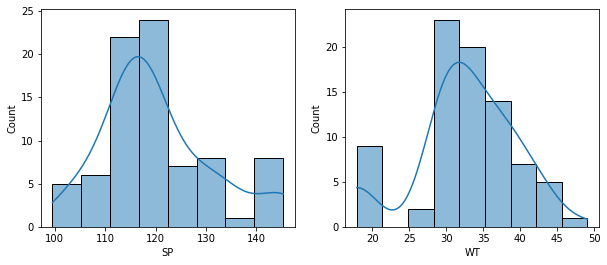

In [11]:
# Distplot of the features
plt.subplots(1,2,figsize=(10,4))
plt.subplot(121) ; sns.histplot(x = data.iloc[:,0],kde = 1)
plt.subplot(122) ; sns.histplot(x = data.iloc[:,1],kde = 1)

The features are normally distributed.

<AxesSubplot:>

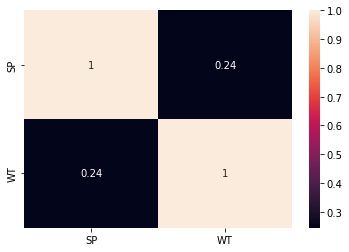

In [12]:
# Heatmap of corr 
sns.heatmap(data.corr(),annot=True)

There is very low correlation between WT and SP

In [13]:
# Transforming the features

# Log Transformation for SP
data.SP = np.log(data.SP)

# Square Transformation for WT
data.WT = np.square(data.WT)

In [14]:
# Checking for skewness
skew_SP = np.round(ss.skew(data.SP),2); print (skew_SP)
skew_WT = np.round(ss.skew(data.WT),2); print (skew_WT)

0.52
0.17


The skewness for the features are acceptable